## Unit 3 - Formalism

<a href="https://colab.research.google.com/github/uqglmn/qm/blob/main/QM_Problem_311.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem 3.11 (a modified version)

(a) Find the momentum-space representations $\phi_n(p)$ of the first five stationary states $\psi_n(x)$ of a massive particle in the harmonic potential well. 

(b) What is the probability (to two significant digits) that a measurement of $p$ on a particle in the state $\phi_n(p)$ would yield a value outside the classical range, $E_{cl}=p^2/2m$?


### Solution

#### Load SymPy and variables

In [1]:
import sympy as sym

In [2]:
# the number of states to find
n = 5  

# variables
m, h, w = sym.symbols("m, hbar, w", positive = True, real = True)
p, x, t = sym.symbols("p, x, t", real = True)

In [3]:
sym.init_printing(use_unicode=True)

#### Solution to (a)

Stationary states:
$$
\psi_n(x) = \frac{1}{\sqrt{n!}} (\hat a_+)^n \psi_0(x) {}\quad\text{ where }\quad{}  
\psi_0(x) = \bigg( \frac{m\omega}{\pi \hbar}\bigg)^{1/4} \exp\bigg( {-}\frac{m\omega}{2\hbar } x^2 \bigg)
$$

Ladder operators:
$$
\hat a_\pm 
= \frac{1}{\sqrt{2\hbar m \omega}} (\mp i \hat p + m \omega x) 
= \frac{1}{\sqrt{2\hbar m \omega}} (\mp \hbar \partial_x + m \omega x) 
$$

The transformation from position-space to momentum-space:
$$
\Phi(p,t) = \frac{1}{\sqrt{2\pi\hbar}} \int_{-\infty}^{+\infty} \exp\bigg({-}\frac{ipx}{\hbar}\bigg)\, \Psi(x,t)\, dx 
$$

First, we define the ground state, the ladder-up and the transformation functions:

In [4]:
# the ground state

𝜓0 = ((m*w)/(sym.pi*h))**sym.Rational(1,4) * sym.exp( -(m*w)/(2*h)*(x**2) ) 

In [5]:
# the ladder-up operator

def a_plus(𝜓):
    return sym.simplify( 1/(sym.sqrt(2*h*m*w))*(-h*sym.diff(𝜓,x,1) + m*w*x*𝜓) )

In [6]:
# the position-space to momentum-space transformation

def momentum(𝜓):
    return sym.simplify( (1/sym.sqrt(2*sym.pi*h) * sym.integrate(sym.exp(-sym.I*p*x/h)*𝜓, (x,-sym.oo,sym.oo) )) )

Computations:

In [7]:
𝜓 = [𝜓0]            # position-space staes
φ = [momentum(𝜓0)]  # momentum-space staes

In [8]:
for i in range(n-1): 
    𝜓.append(1/sym.sqrt(i+1)*a_plus(𝜓[i]))
    φ.append(momentum(𝜓[i+1]))
    print(f"{i+1}th state computed", end="\r")
print("Done                ")

Done                


Sanity check - verify normalisation:

In [9]:
for i in range(n):
    print(sym.integrate(sym.conjugate(𝜓[i])*𝜓[i], (x,-sym.oo,sym.oo)), 
          sym.integrate(sym.conjugate(φ[i])*φ[i], (p,-sym.oo,sym.oo)))

1 1
1 1
1 1
1 1
1 1


Let's inspect the fifth state:

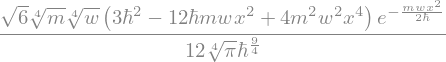

In [10]:
𝜓[4]  # position-space

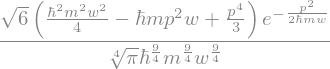

In [11]:
φ[4]  # momentum-space

#### Solution to (b)

Equating the classical energy $E_{cl}$ and the energy of the stationary state $E_n$ we get

$$
\frac{p_{cl}^2}{2m } = \hbar \omega\bigg(n + \frac12\bigg) 
{}\quad\Longrightarrow\quad{}
p_{cl} = \sqrt{\hbar m \omega( 2n + 1)}
$$

The probability that a measurement of $p$ on a particle would yield a value outside the classical range is

$$
P_{outside} = 1 - \int_{-p_{cl}}^{p_{cl}} |\Phi(p,t)|^2 dp
$$

In [12]:
P = []

for i in range(n):
    Pin = sym.N( sym.integrate(sym.conjugate(φ[i])*φ[i], (p,-sym.sqrt(h*m*w*(2*i+1)),sym.sqrt(h*m*w*(2*i+1)))).simplify() )
    P.append( 1 - Pin ) 
    print(f"{i}th case computed", end="\r")
print("Done                ")

Done                


The probabilities to observe the state with momentum outside the classical region are:

In [13]:
import numpy as np
np.array(P, dtype=float).round(2)

array([0.16, 0.11, 0.1 , 0.09, 0.08])

---